In [68]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.calibration import LabelEncoder
import matplotlib.pyplot as plt

In [69]:
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
columns=['PassengerId','Name','Age','Ticket','Fare','Cabin']
df=df.drop(columns,axis=1)
df.dropna(inplace=True)

In [71]:
le=LabelEncoder()
df["Sex"]=le.fit_transform(df["Sex"])
df["Embarked"]=le.fit_transform(df["Embarked"])
df

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,1,1,0,2
1,1,1,0,1,0,0
2,1,3,0,0,0,2
3,1,1,0,1,0,2
4,0,3,1,0,0,2
...,...,...,...,...,...,...
886,0,2,1,0,0,2
887,1,1,0,0,0,2
888,0,3,0,1,2,2
889,1,1,1,0,0,0


In [72]:
x=df[["Pclass","Sex","SibSp","Parch","Embarked"]]
y=df['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [73]:
dc=DecisionTreeClassifier(max_depth=3)
model=dc.fit(x_train,y_train)
model

DecisionTreeClassifier(max_depth=3)

In [74]:
y_predict=model.predict(x_test)

In [75]:
print("Accuracy:",accuracy_score(y_test,y_predict))

Accuracy: 0.8089887640449438


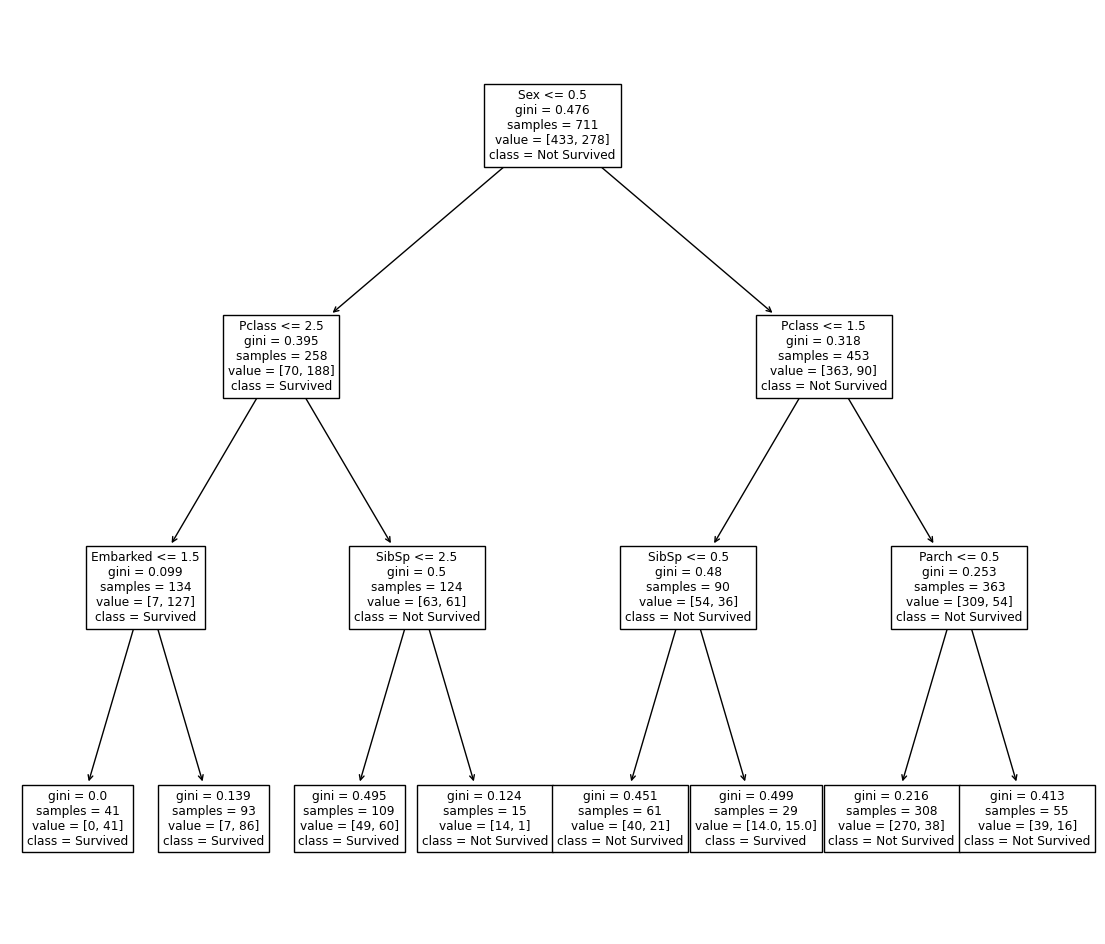

In [76]:
import matplotlib.pyplot as figure
fig=plt.figure(figsize=(14,12))
plot_tree(model,feature_names=["Pclass","Sex","SibSp","Parch","Embarked"],class_names=["Not Survived","Survived"])
plt.show()